# Linear Algebra
Author: Vo, Huynh Quang Nguyen

In [2]:
import numpy as np

## Acknowledgements:
The contents of this note are based on the lecture notes and the materials from the following source:
1. _Mathematics for Machine Learning_ course given by Prof. David Dye, Dr. Samuel J. Cooper, and Dr. A. Freddie Page from Imperial College London. Available in Coursera.
2. _Essential Math for Data Science in 6 Weeks_ webinar given by Dr. Thomas Nield. Available in O'Reily Learning.
3. _Deep Learning_ book by Dr. Ian Goodfellow, Prof. Yoshua Bengio, and Prof. Aaron Courville. The book is available for public access via an designated website.
4. _ELEC-E3240 Photonics_ given by Prof. Zhipei Sun and Huynh Quang Nguyen Vo (Teaching Assistant).

## Table of Contents
1. [Introduction to Linear Algebra](#Section1) 
2. [Vector operations](#Section2) 
3. [Matrix operations](#Section3) 
4. [Solving systems of equations](#Section4)
5. [Eigenvalues and Eigenvectors](#Section5)
6. [Appendix](#Section6)

## I. Introduction to Linear Algebra <a name = 'Section1'></a>

### 1. Why we have to learn?

* Firstly, linear algebra can be found in many areas of science, technology, engineering, and data science. 
* Secondly, linear algebra is also the backbone of machine learning, data management, graphical modelling, and other computer science areas.
* Thirdly, modern computers model data as vectors and matrices to perform operations more effectively.

Therefore, linear algebra is a **MUST** to advance your knowledge in machine learning, statistical modelling, or other areas in computer science then linear algebra is a must!

***

### 2. Applications of Linear Algebra

As mentioned earlier, linear algebra serves as a backbone in many scientific fields. Below are selected examples of how it is applied.

#### Optics

<div>
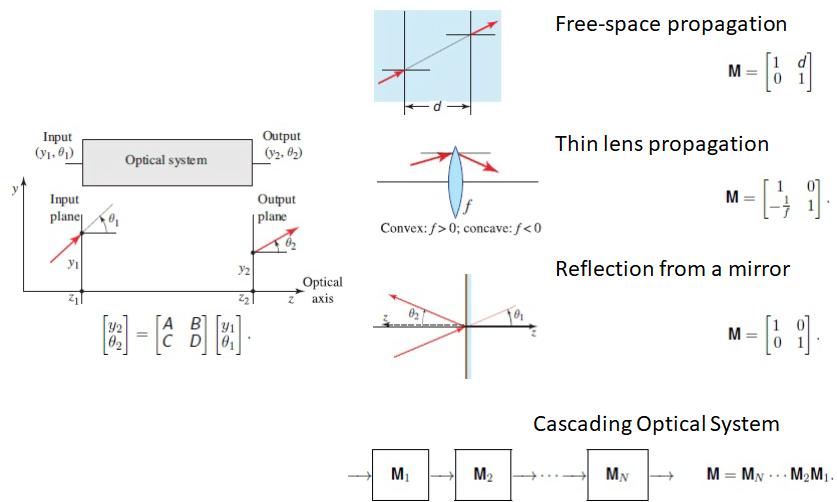
</div>

Figure 1: Relationship between an input image and an output image formed by an optical system (adapted from **Fundamentals of Photonics** by Saleh et al.). This method of image computation, which is usually referred to as the ABCD matrix transformation, is widely employed when designing an optical system such as a microscope, a telescope, or a laser guidance system.

#### Computer vision

<div>
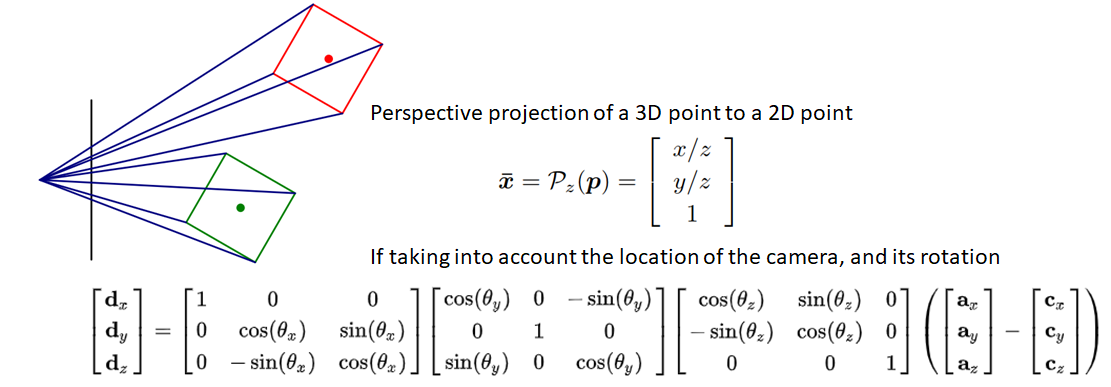
</div>

Figure 2: Perspective transformation from 3D into 2D (adapted from **Computer Vision: Algorithms and Applications** by Szeliski). This method of projection is popular in computer graphics when recreating 3D models in 2D environments.


![SegmentLocal](2D_Convolution_Animation.gif)
Figure 3: Operating principles of a 2-D convolution. The convolution operation serves as a backbone in mask-based image filtering, and convolutional neural network. 

#### Geography
<div>
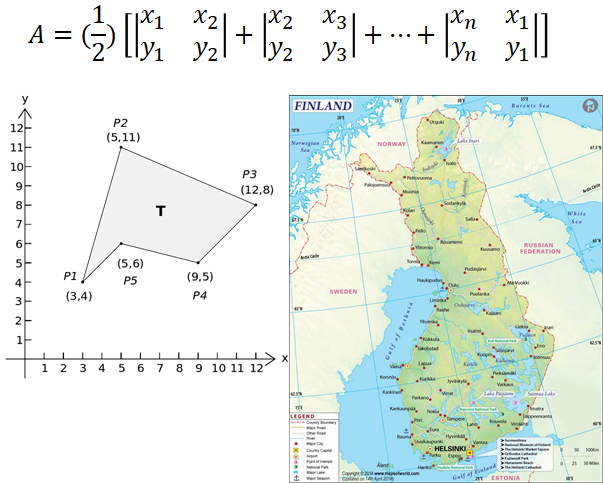    
</div>
Figure 4: Computation of an area of a polygon using coordinates. This method, which is often referred to as the shoelace algorithm or Gaussian area algorithm, is widely employed in computational geography for computing the area of a region.

#### Signal Processing
<div>
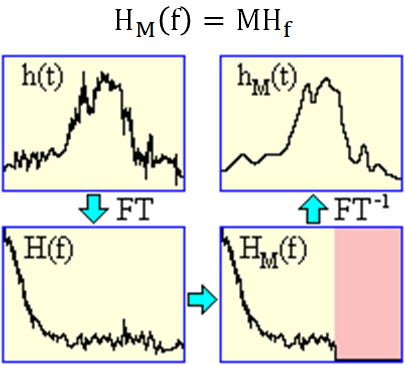
</div>
Figure 4: Operating principles of a digital filter. A signal in the time-domain is transformed to frequency-domain using Fourier transform, then subjected to a digital filter to smoothen out, and finally converted back to the time-domain. This concept of filtering in frequency-domain can also be applicable for image processing.


## II. Vector operations

### 1. What is a vector:
1. Vectors are an arrow in space, with a specific direction and length. This can mean different things to different disciplines:
    * Physics - direction and magnitude (e.g velocity)
    * Computer Science - an array of data.
    * Math - A direction and scale on a designated coordinate system.


2. For a two-dimensional vector, we can think of it as a pair of numbers. For example, we can interpret the following vector $\hat{v} = [3,4] $ as follows:
    * This vector has the name of $\hat{v}$.
    * From the origin (0,0) we make 3 steps along the x-axis, and 4 steps up the y-axis. 


3. In practice, vectors must start at the origin (0,0) and cannot arbitrarily start at any point in space.

<div>
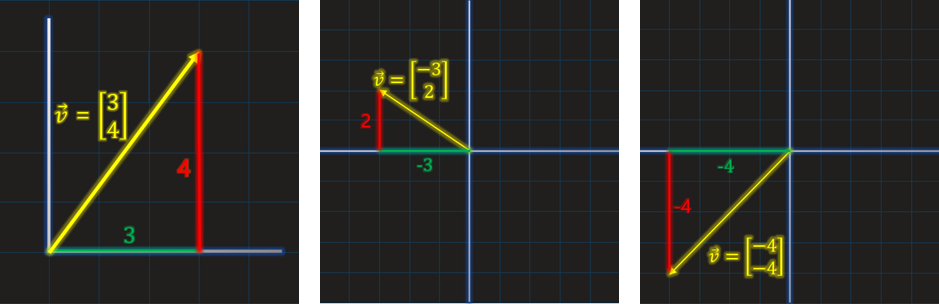
</div>
Figure 1: Examples of 2D vectors.

4. Vectors can apply beyond just a 2-dimensional space. In practice, vectors can exist in any number of dimensions, although it gets hard to visualize outside of a 3-dimension space.


In [3]:
##
# DEMO: DECLARING A VECTOR
#

v = [3.0, 4.0, 5.0]
v = np.array(v)     # We use this function to convert a Python list into a vector
print(v)
print(v.shape)      #We use this function to determine the dimension of our vector

[3. 4. 5.]
(3,)


### 2. Basic operations with vectors

#### a) Vector-on-vector addition and subtraction
1. To visually add these two vectors together, connect one vector after the other and walk to the tip of the last vector. The point we end at is a new vector, the result of summing the two vectors. 


2. Because of the commutative nature of adding vectors, as it does not matter which order we add them.

$$
\hat{v} + \hat{w} = \begin{bmatrix} 3 \\ 2 \end{bmatrix} + \begin{bmatrix} 2 \\ -1 \end{bmatrix} = \begin{bmatrix} 2 \\ -1 \end{bmatrix} + \begin{bmatrix} 3 \\ 2 \end{bmatrix} = \begin{bmatrix} 5 \\ 1 \end{bmatrix}
$$

3. For subtraction, we can imagine it as a vector $\hat{v}$ sums with a 'negative' vector $-\hat{w}$ out of the original $\hat{w}$. Noted that the 'negative' notion here means a vector having the same length but with an opposite direction.

<div>
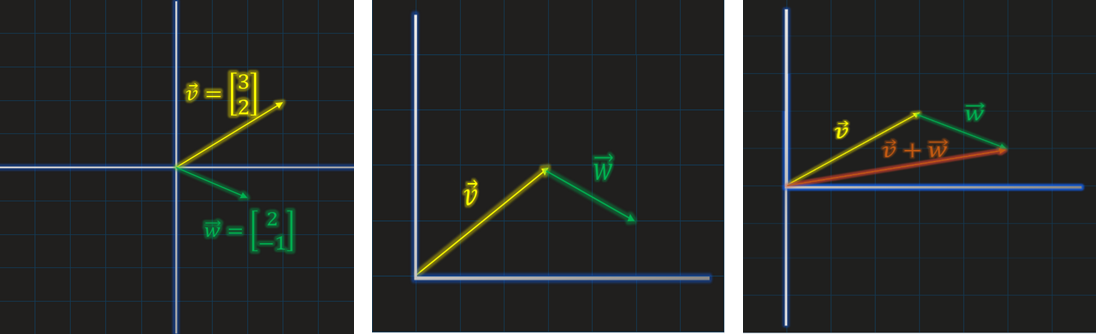
</div>

Figure 2: An example of adding two vectors together by connecting one vector after the other and walking to the tip of the last vector.

#### b) Vector-on-vector Multiplication
1. We can also grow/shrink a vector by multiplying (others referred to this as scaling, though it is a matter of word choice) with a scalar value.

<div>
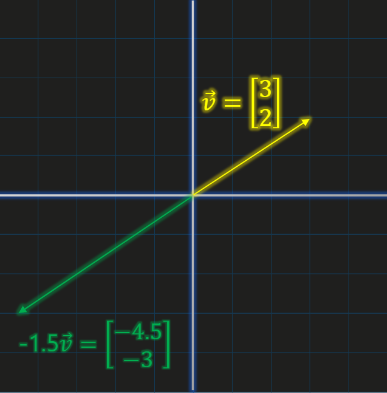
</div>

Figure 3: An example of scaling a vector by a scalar: positive scalars increase/decrease the length of a vector, while negative scalars not only increase/decrease but also reverse a direction of a vector. 

#### c) Magnitude and Normalization
1. A magnitude (length) of a vector can be computed as follows:
$$
||\hat{v}|| = \sqrt{v_1^2 + v_2^2 + ... + v_n^2}
$$

2. A vector can be normalized by dividing its elements by their magnitude:

$$
\hat{v}_{norm} = \frac{\hat{v}}{||\hat{v}||} = \frac{1}{\sqrt{v_1^2 + v_2^2 + ... + v_n^2}}\begin{bmatrix} v_1\\ v_2 \\ ... \\v_n \end{bmatrix}
$$

3. The above equation that computes the length of a vector is the so-called $L^2$ normalization also known as the **Euclidean** normalization. In practice, a vector can be subjected to $L^p$ normalization with $p\ge1$:
$$
||\hat{v}||_p = (\sum_{i} |v_i|^p)^{1/p}
$$

#### d) Dot product and cross product
1. Dot product, also known as scalar product or inner product, is a pair-wise operation between two vectors and returns a single number. Geometrically speaking in 2D and 3D, it is the product of the Euclidean magnitudes of the two vectors and the cosine of the angle between them.

$$
\hat{v} \bullet \hat{w} = ||\hat{v}||_2||\hat{w}||_2cos(\hat{v},\hat{w})
$$

$$
\hat{v} \bullet \hat{w} = v_1w_1 + v_2w_2 + ... + v_nw_n
$$

2. Cross product is the operation that takes two vectors and returns a vector that is perpendicular to the plane from the aforementioned vectors.
$$
\hat{v} \times \hat{w} = ||\hat{v}||_2||\hat{w}||_2cos(\hat{v},\hat{w})
$$

<div>
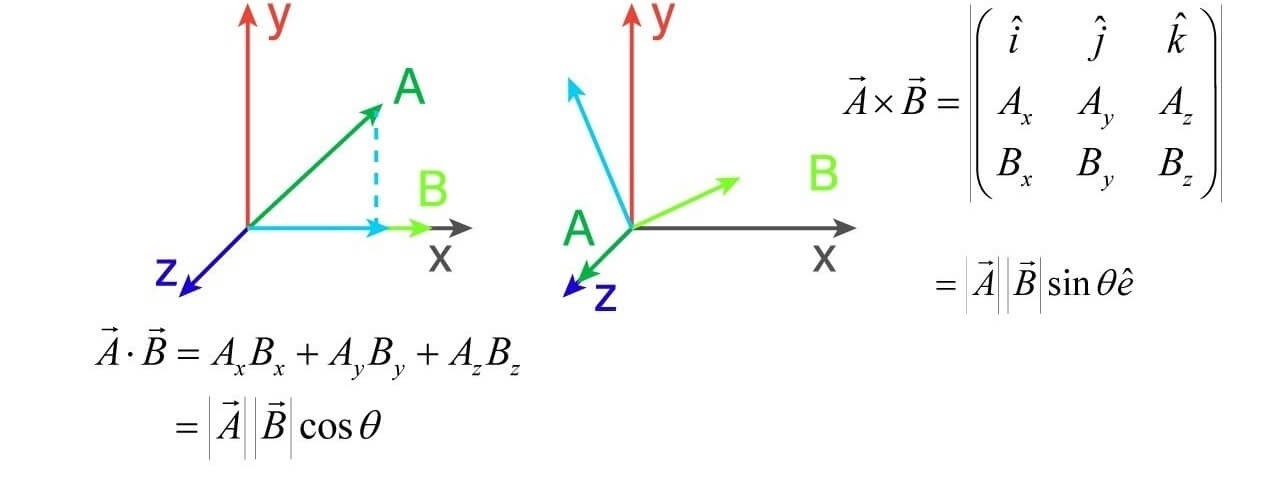
</div>

Figure 4: Visualization of a dot product and a cross product between vector $\hat{A}$ and $\hat{B}$. The angle between $\hat{A}$ and $\hat{B}$ is $\theta$. Notice the notion $\hat{e}$ means the result of a cross product is a vector.

#### e) Scalar projection
1. Scalar projects are the size of the “shadow” of a vector onto another vector, if we imagine the sun shining down perpendicular to the second vector. Vector projections are that shadow vector. As the names imply, scalar projects are scalars and vector projections are vectors.

<div>
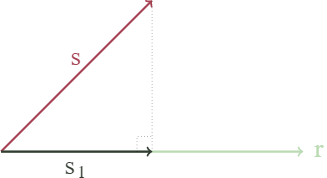
</div>

Figure 5: An example of a vector $\hat{s}$ projected onto another vector $\hat{r}$ resulting a vector $\hat{s_1}$.

2. The scalar projection of $\hat{s}$ onto $\hat{r}$ is calculated as :

$$
\frac{\hat{r}\bullet\hat{s}}{||\hat{r}||_2}
$$ 

3. The vector projection is calculated as:

$$\hat{r}\frac{\hat{r}\bullet\hat{s}}{r^2}
$$

For example, we want to project on $\hat{s} = \begin{bmatrix} 10 \\ 5 \\ -6 \end{bmatrix}$ onto $\begin{bmatrix} 3 \\ -4 \\ 0 \end{bmatrix}$.
* The resulting scalar projection is $\frac{\hat{r}\bullet\hat{s}}{||\hat{r}||_2} = \frac{10}{5} = 2 $
* The resulting vector projection is $\hat{r}\frac{\hat{r}\bullet\hat{s}}{r^2} = \begin{bmatrix} 3 \\ -4 \\ 0\end{bmatrix} \frac{10}{25} = \begin{bmatrix} 6/5 \\ -8/5 \\ 0 \end{bmatrix}$

#### f) Basis vectors, basis decomposition and basis transformation
1. A vector can be decomposed and represented by its basis vectors. For example, consider a vector $\hat{v} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}$, it can be decompose into:
$$
\hat{v} = \begin{bmatrix} 3 \\ 2 \end{bmatrix} = 3\hat{i} + 2\hat{j} = 3\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 2\begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

2. Thus, we can understand that the basis vectors are the “reference points” we use to describe other vectors. A basis vector having a length of 1 and point in perpendicular positive directions is called the **standard basis vector**. In 2D, two **standard basis vectors** (one for the x-axis and the other for the y-axis) can be combined to form a so-called **identity matrix**.

$$
\hat{i}\hat{j} = \begin{bmatrix} 1 & 0\\ 0 & 1 \end{bmatrix}
$$

The basis vector concept can be extended beyond 2D ($\hat{i}$, $\hat{j}$) to 3D ($\hat{i}$, $\hat{j}$, $\hat{k}$), and to
as many additional dimensions we need. As a result, we can expand the above **identity matrix** to a multi-dimensional **identity matrix**.

$$
\mathbf{I} = \begin{bmatrix} 1 & 0 & 0 & ... & 0 \\ 0 & 1 & 0 & ...  & 0 \\ 0 & 0 & 1 & ... & 0 \\ ... & ... & ... & ... & ... \\ 0 & 0 & 0 & ... & 1  \end{bmatrix}
$$

Overall, the basis vectors can be anything as long as they are **orthogonal** to each other, which means their dot product is zero.

3. To conduct a basis decomposition of a vector $\hat{v}$ onto a set of basis vectors $\hat{b_1}$ and $\hat{b_2}$, we can simply use:
$$
v'_{b_1} = \frac{\hat{b_1}\bullet\hat{v}}{b_1^2}
$$

$$
v'_{b_2} = \frac{\hat{b_2}\bullet\hat{v}}{b_2^2}
$$

$$
\hat{v}'= \begin{bmatrix} v'_{b_1} \\ v'_{b_2} \end{bmatrix}
$$

If the basis vectors are the standard basis vectors, then it is very straightforward. 


<div>
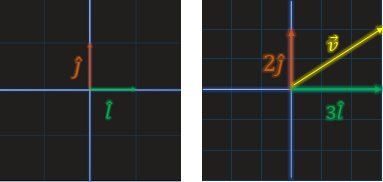
</div>

Figure 6: Visualization of two standard basis vectors $\hat{i}$ and $\hat{j}$ (left), and how a vector is represented using two basis vectors (right).

4. Basis transformation, to put it simply, is changing from one set of reference points to another set of reference points. This transformation usually involves a matrix.  

<div>
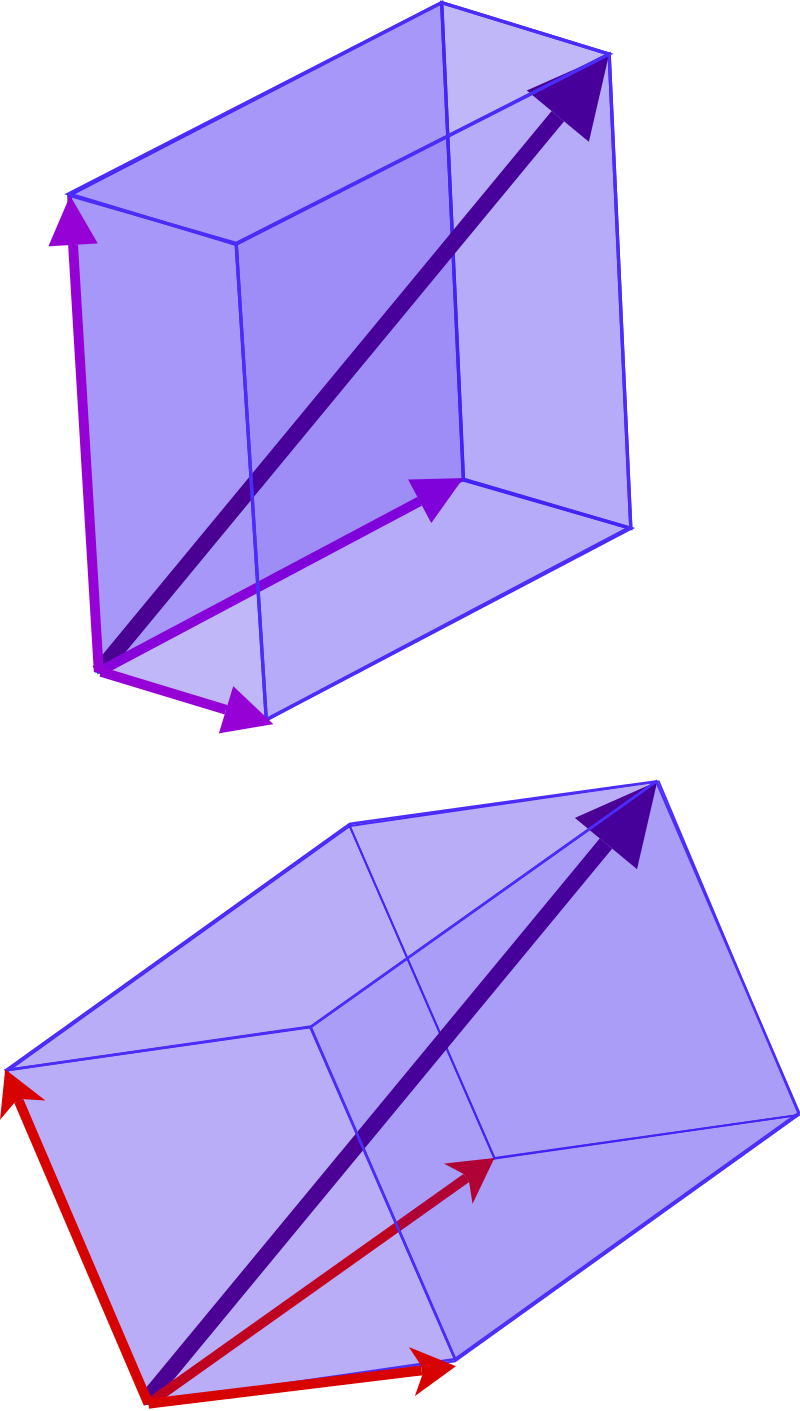
</div>

Figure 7: Visualization of two different sets of basis vectors. They can be transformed to one another by using basis transformation.

#### d) Span and linearly independent
1. These vectors $\hat{v}$ and $\hat{w}$, fixed in two different directions, can be scaled and added to create **any** new vector $\alpha\hat{v} + \beta\hat{w}$. 


2. The entire space of vectors we can create from two vectors fixed in direction but allowed to scale is known as **span**. 


3. Therefore, if the sum of these two vectors gives us access to all vectors in space, they are called **linearly independent**.

<div>
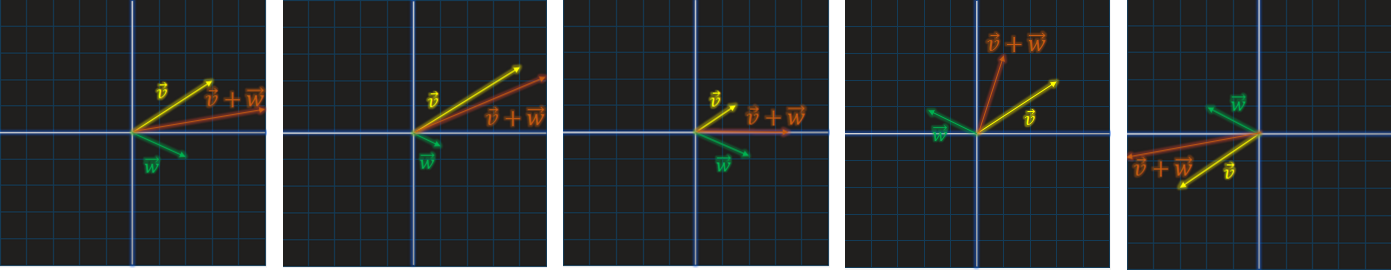
</div>

Figure 8: Examples of span and linearly independence among two vectors: only the first three examples are valid in term of span because the direction of each vector is fixed.


4. Characteristics of linear independency:
    * With a 3D vector space, if two vectors are linearly dependent (share a direction) but the third vector is linearly independent of the other two, the span will be a flat plane in space. 
    * If all three vectors were linearly dependent, their span would only be a line in space. 
    * This concept applies to any number of dimensions, not just 2 or 3.
    
<div>
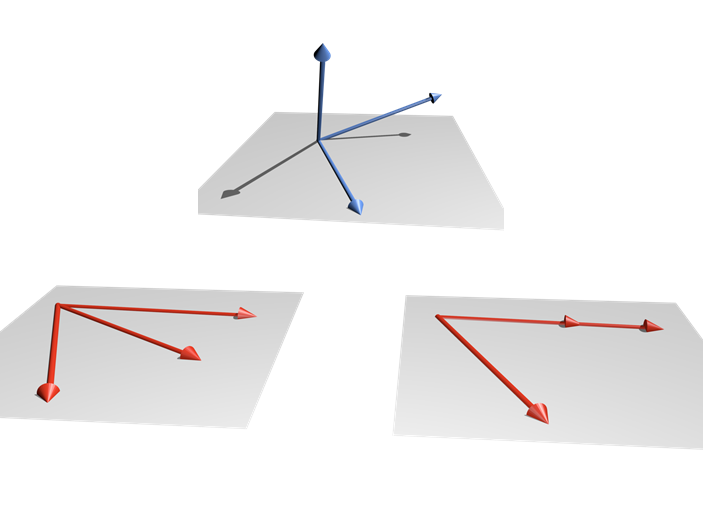
</div>

Figure 9: An examples of three linearly independent vectors forming a span that is a 3D space (top). If one or two of them are linear dependent, their span will be a flat plane in space.


5. We can determine whether a set of vectors are linear independent using the following steps:
    * For example, we have three vectors to consider $\hat{v}_1 = \begin{bmatrix} 0 \\ 1 \\ 5 \end{bmatrix} $, $\hat{v}_2 = \begin{bmatrix} 1 \\ 2 \\ 8 \end{bmatrix} $, $\hat{v}_3 = \begin{bmatrix} 4 \\ -1 \\ 0 \end{bmatrix} $. To determine the linear independecy, we need to find a set of scalars that fulfills
$$
c_1 \begin{bmatrix} 0 \\ 1 \\ 5 \end{bmatrix} + c_2 \begin{bmatrix} 1 \\ 2 \\ 8 \end{bmatrix} + c_3 \begin{bmatrix} 4 \\ -1 \\ 0 \end{bmatrix} = 0 
$$
    * After solving this, the only set of scalars that fulfills this equation is $c_1 = c_2 = c_3 = 0$. Therefore, we can conclude that these vectors are linear indepedent.
    * An easier method is forming a matrix containing the vectors-under-interest, then finding its matrix determinant. If the determinant is zero, then some or all vectors-under-interest are linear dependents.


In [12]:
v = np.array([3, 2])
w = np.array([2, -1])

##
# DEMO: VECTOR-ON-VECTOR ADDITION
#
add = v + w
print(add)

##
# DEMO: VECTOR-ON-VECTOR MULTIPLICATION
#
mul = -1.5 * v
print(mul)

##
# DEMO: DOT PRODUCT AND CROSS PRODUCT
#
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
dot = np.dot(x,y)
cross = np.cross(x,y)
print(dot)
print(cross)

##
# DEMO: BASIC DECOMPOSITION
#
i_hat = np.array([3, 4])
j_hat = np.array([4, -3])
v = np.array([10,-5])

w = [np.dot(i_hat,v) / np.linalg.norm(i_hat) ** 2, 
     np.dot(j_hat,v) / np.linalg.norm(j_hat)** 2]
print(w)

##
# DEMO: LINEAR INDEPENDENCE
#
v_1 = np.array([0,1,5])
v_2 = np.array([1,2,8])
v_3 = np.array([4,-1,0])

v = np.array([v_1, v_2, v_3]).transpose()
result = np.linalg.det(v)

if not result == 0:
    print('These vectors are linear independent.')
   

[5 1]
[-4.5 -3. ]
32
[-3  6 -3]
[0.4, 2.2]
These vectors are linear independent.


## II. Matrix operations <a name = "Section2" ></a>

### 1. What is a matrix:
1. A matrix is like a vector (or collection of vectors), and it can have multiple rows and columns. 
2. In practice, matrix is a convenient way to package data. For example, it is more convenient to represent a system of equations as matrices.

In [ ]:
##
# DEMO: DECLARE A MATRIX
#
v = [[3,4,5], [6,7,8]]
v = np.array(v)
print(v)
print(v.shape)

### 2. Basic matrix operations:

#### a. Matrix-on-vector multiplication
1. Recall the basis transformation, the basis transformation is technically speaking a matrix-on-vector multiplication.
$$
\begin{bmatrix} x_{new} \\ y_{new} \end{bmatrix} = \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} x_{old} \\ y_{old} \end{bmatrix}
$$

For example, finding an image (output) of an object formed by an optical system is just applying matrix-vector multiplication. Here, our vectors are an object and its corresponding image, and the matrix is the transformation matrix (**M**) of the system.

<div>
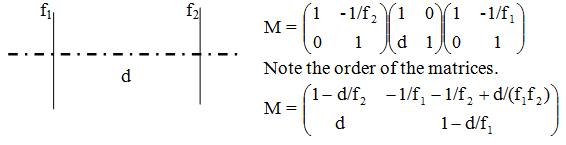
</div>

Figure 1: Example of a transformation matrix **M** of a two-thin-lens system where each lens is separate by a distance $d$.

Another example is vector rotation by an angle of $\theta$. 

<div>
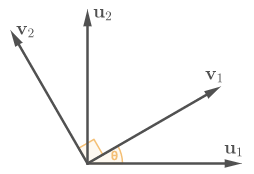
</div>

Figure 2: Rotation of a vector $\hat{u}$ into a vector $\hat{v}$ by an angle $\theta$.

$$
\hat{v} = \hat{u}\begin{bmatrix} cos\theta & -sin\theta \\ sin\theta  & cos\theta \end{bmatrix}
$$
2. Matrix-vector multiplication is done by computing the dot product between a matrix and a vector:

<div>
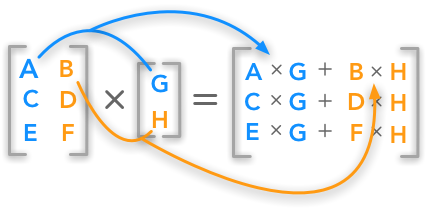
</div>

Figure 3: How the dot product between a matrix and a vector works.

3. Using this concept, we can describe a wide variety of transformations such as rotations, reflections, dilations, and much more.

#### b. Linear Transformation

1. To make things simple, let's consider the rotation of basis $(\hat{u_1},\hat{u_2})$ to the new basis $(\hat{v_1},\hat{v_2})$ by an angle $\theta$. Here, the basis notation means 'a reference system' consisting of 'reference points' that are our basis vectors.

We know that this basis rotation is simply put a basis transformation:
$$
(\hat{v_1},\hat{v_2})  =  (\hat{u_1},\hat{u_2}) \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta  & cos\theta \end{bmatrix}
$$    

Therefore, we can simply describe this using this formula:
$$
(\hat{v_1},\hat{v_2})  =  (\hat{u_1},\hat{u_2})(\mathbf{u}→\mathbf{v})
$$

Because of the basis transformation, we can describe a changes of a coordinates of a vector from an old basis $(\hat{u_1},\hat{u_2})$ to a new basis $(\hat{v_1},\hat{v_2})$ as: 

$$
\begin{bmatrix} x_{new} \\ y_{new} \end{bmatrix} = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta  & cos\theta \end{bmatrix} \begin{bmatrix} x_{old} \\ y_{old} \end{bmatrix}
$$

or in this formula:

$$
\mathbf{x}^{\mathbf{v}} = (\mathbf{u}→\mathbf{v})\mathbf{x}^{\mathbf{u}}
$$


Next, imagine that we fix our old basis $(\hat{u_1},\hat{u_2})$ and now represent all vectors with this basis. So, we have a vector $\hat{x}$ then we rotate it by an angle $\theta$ to transform into a vector $\hat{y}$. Now, instead of describing the vector $\hat{y}$ with a new basis $(\hat{v_1},\hat{v_2})$, we describe that vector with our own fixed basis. This description is called linear transformation, and can be simply described with the formula:

$$
\mathbf{y}^{\mathbf{u}} = (\mathbf{u}→\mathbf{v})\mathbf{x}^{\mathbf{u}}
$$

2. Think of linear transformation as tracking where the basis vectors land, and then we can use that to transform a vector also. This concept of seeing where the basis vectors land is important because it allows us not just to create vectors but also transform existing vectors.

For example, we have this vector $\hat{v} = \begin{bmatrix} 4 \\ 2 \end{bmatrix}$, and we transformed it somehow and it became $\hat{w}$. The basis vectors $\hat{i}$ and $\hat{j}$ now land at $\begin{bmatrix} -0.25 \\ 0 \end{bmatrix}$ and $\begin{bmatrix} 0 \\ -1 \end{bmatrix}$, respectively. We can describe the new vector with our fixed basis ($\hat{i}$, $\hat{j}$) as:

$$
\hat{w} = \begin{bmatrix} -0.25 & 0 \\ 0 & -1 \end{bmatrix} \hat{v} = \begin{bmatrix} -1 \\ -2 \end{bmatrix}
$$

$$
$$

<div>
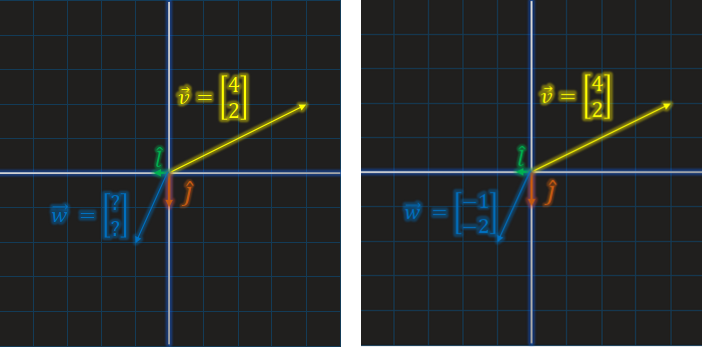
</div>

Figure 4: An example of the linear transformation: linear transformation is tracking where the basis vectors land and use them to describe a transformed vector.

#### c. Determinant
1. When we perform linear transformations, we are expanding or reducing space, and the degree of this expansion or reduction is called **determinant**. In other words, **determinants** describe how much a sampled area in vector space changes in scale with linear transformations.

2. Characteristics of determinant:
    * Scaling will increase or decrease the determinant, as that will increase/decrease the sampled area.
    * When the orientation flips (for example, $\hat{i}$ and $\hat{j}$ swap clockwise positions) then the determinant will be negative.
    * When a determinant is 0, that means the transformation is linearly dependent and has squished all of space into a line. Because at this point, there is no area! This is why testing whether a determinant is zero tells us about linear dependency.
    * As usual, the determinant extends to 3 or more dimensions. At higher dimensions, it becomes a matter of visualizing a sampled volume scaling, rotating, sheering, and flipping.
    

#### d. Matrix-on-Matrix Multiplication
1. We can think of matrix multiplication as applying multiple transformations to a vector space. In other words, we can think of each transformation matrix as a function, where we apply from the inner-most and then outwards. 

For example, we have a vector $\hat{v}$, and we want to apply the rotation then a sheer transformations to this vector:
* The rotation transformation is described as: $\mathbf{r} = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$.
* The shear transformation is described as: $\mathbf{s} = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$.
* The combined rotation and shear is: $\mathbf{M} = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$. Notice the order of the matrices.
* Therefore, the new vector $\hat{w}$ is:
$\hat{w} = \begin{bmatrix} x_{new} \\ y_{new} \end{bmatrix} = M \begin{bmatrix} x_{old} \\ y_{old} \end{bmatrix} $

<div>
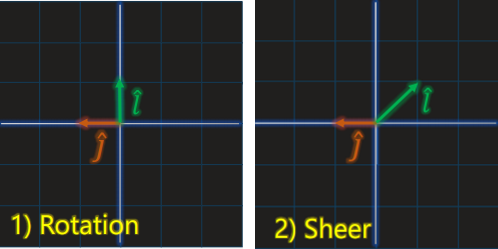
</div>

Figure 5: An example of how rotation and shear transformations look like.


In [12]:
##
# DEMO: MATRIX-ON-MATRIX MULTIPLICATION
#
R = np.array([[0, -1],[1,0]])
S = np.array([[1,1],[0,1]])

M = np.dot(S,R)
print(M)

[[ 1 -1]
 [ 1  0]]


## IV. Solving a system of linear equations <a name = "Section4"></a>
1. We can represent a system of linear equations as a set of matrices.

For example, we have a system of equation like this:
$$
4x + 2y + 4z = 44
$$
$$
5x + 3y + 7z = 56
$$
$$
9x + 3y + 6z = 72
$$
* We need to solve for x, y and z so we can rewrite our system as: $ \mathbf{A} = \begin{bmatrix} 4 & 2 & 4 \\ 5 & 3 & 7 \\ 9 & 3 & 6 \end{bmatrix}$, $\mathbf{B} = \begin{bmatrix} 44 \\ 56 \\ 72 \end{bmatrix}$, $\mathbf{C} = \begin{bmatrix} x \\ y \\ z \end{bmatrix}$
* We know that: $\mathbf{A}\mathbf{X} = \mathbf{B}$. Therefore, we can rewrite $\mathbf{X}$ as function between $\mathbf{A}$ and $\mathbf{B}$ as: $\mathbf{X} = \mathbf{A}^{-1}\mathbf{B}$, with $\mathbf{A}^{-1}$ is the inverse matrix of $\mathbf{A}$. 

In [6]:
##
# DEMO: SOLVING A SYSTEM OF LINEAR EQUATIONS:
#
A = np.array([[4,2,4],[5,3,7],[9,3,6]])
B = np.array([44,56,72]).transpose()
X = np.dot(np.linalg.inv(A),B)
print(X)

[ 2. 34. -8.]


## V. Eigen values and eigen vectors <a name = "Section5"></a>

###  Matrix decomposition
1. It is the method of breaking up a matrix into its basic components. Matrix decomposition is helpful for tasks like finding inverse matrices, calculating determinants, as well as linear regression.

2. There are many ways to decompose a matrix, but the most common method is eigendecomposition, which is often used for machine learning and Principal Component Analysis (PCA). 

### Eigen decomposition
1. For a square matrix **A**, an eigenvector ($\hat{v}$) and eigenvalue ($\lambda$) make this equation true:
$$
\mathbf{A}\hat{v} = \lambda\hat{v}
$$

For example, we have a square matrix **A** = $\begin{bmatrix} -6 & 3 \\ 4 & 5 \end{bmatrix}$. Its eigenvector and eigenvalue is $\begin{bmatrix} 1 \\ 4 \end{bmatrix}$ and 6, respectively.

* Compute the left-hand size (LHS) of the equation: $\mathbf{A}\hat{v} = \begin{bmatrix} -6 & 3 \\ 4 & 5 \end{bmatrix} \begin{bmatrix} 1 \\ 4 \end{bmatrix} = \begin{bmatrix} 6 \\ 24 \end{bmatrix} $
* Compute the right-hand size (RHS) of the equation: $\lambda\hat{v} = 6 \begin{bmatrix} 1 \\ 4 \end{bmatrix} = \begin{bmatrix} 6 \\ 24 \end{bmatrix} $
* Therefore, the equation is fulfilled.

2. To put it simply, eigen decomposition is a type of transformation to find the eigenvalues and eigenvectors.

3. We assume that the eigenvector is non-zero.

### Finding eigen parameters:
1. First, we find the eigenvalue by manipulating our equation:
$$
\mathbf{A}\hat{v} = \lambda\hat{v}
$$

$$
\mathbf{A}\hat{v} - \lambda I\hat{v} = 0
$$

$$
\mathbf{det}(\mathbf{A} - \lambda I) = 0
$$

For example, we have a square matrix **A** = $\begin{bmatrix} -6 & 3 \\ 4 & 5 \end{bmatrix}$, then the final equation becomes:
$$
\mathbf{det}(\begin{bmatrix} -6 & 3 \\ 4 & 5 \end{bmatrix} - \lambda\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}) = 0
$$

$$
\mathbf{det}(\begin{bmatrix} -6 - \lambda & 3 \\ 4 & 5 - \lambda \end{bmatrix}) = 0
$$

$$
(-6 -\lambda)(5-\lambda) - 3\times4 = 0
$$

$$
\lambda^2 + \lambda - 42 = 0
$$

From here, we get two possible eigenvalues being -7 and 6.

2. Using the eigenvalues, we can calculate our respective eigenvectors by substituting them with the original equation.

Using the above example, for the eigenvalue of 6 we have:
$$
\begin{bmatrix} -6 & 3 \\ 4 & 5 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = 6 \begin{bmatrix} x \\ y \end{bmatrix}
$$

$$
\begin{bmatrix} -6 & 3 \\ 4 & 5 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} - 6\begin{bmatrix} 1 & 0 \\ 0 & 1  \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = 0
$$

$$
\begin{bmatrix} -12 & 3 \\ 4 & -1 \end{bmatrix}\begin{bmatrix} x \\ y \end{bmatrix} = 0
$$

$$
\begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 1 \\ 4 \end{bmatrix}
$$

### Why eigen parameters?
1. Finding the eigen parameters means we are finding a vector that when our matrix-under-interest multiplies with the former, the matrix does not change its direction!

2. The only thing that changes is the 'size' of the matrix:
    * 1 means no change,
    * 2 means doubling in length,
    * −1 means pointing backwards along the eigenvalue's direction.


In [ ]:
##
# Find the eigen parameters
#
A = [[1,2], [4,5]]
A = np.array(A)

eigenvals, eigenvecs = np.linalg.eig(A)
print(A)
print(eigenvals)
print(eigenvecs)

### Reconstructing a matrix from eigen parameters.
1. From the original equation, we can reconstruct a matrix from eigen parameters using:
$$
A = Q\Lambda Q^{-1}
$$
in which Q is the matrix of eigenvectors, $\Lambda$ is the eigenvalues in diagonal form, and $Q^{-1}$ is the inverse of the matrix.

For example, we have a matrix **A** = $\begin{bmatrix} 1 & 2 \\ 4 & 5 \end{bmatrix}$, and we manage to find its eigenvalues to be -0.464 and 6.464, its eigenvectors to be $\begin{bmatrix} 0.806 \\ 0.343\end{bmatrix}$ and $\begin{bmatrix} 0.59 \\ -0.939 \end{bmatrix}$, respectively.

* We rewrite our eigenvalues and eigenvectors. For eigenvalues: $\begin{bmatrix} -0.464 \\ 6.464 \end{bmatrix}$, while for eigenvectors: $\begin{bmatrix} 0.806 & 0.343 \\ 0.59 & -0.939\end{bmatrix}$ 
* We apply the equation to reconstruct **A**.

In [ ]:
##
# Reconstruct a matrix from its eigen parameters
#
Q = eigenvecs
Lambda = np.diag(eigenvals)
A = Q.dot(Lambda).dot(np.linalg.inv(Q))
print(A)

## Appendix

### 1. Rediscovering dot product
1. We know that dot product is an operation that does a multiply/add operation between elements in vectors and matrices. So exactly what does it try to accomplish?

2. We can think of the dot product between two vectors as taking one vector’s length, and projecting another vector onto it and multiplying that resulting vector’s length.
For example, we project $\hat{w}$ directly onto $\hat{v}$. The dot product between $\hat{w}$ and $\hat{v}$ is a scalar that is the product between the projection of $\hat{w}$'s length and the $\hat{v}$'s length.

<div>
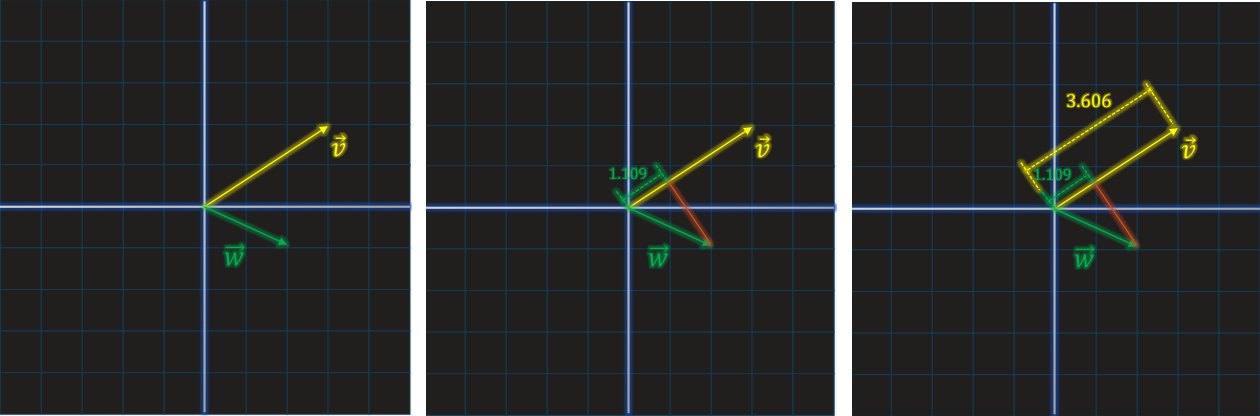
</div>

Figure 1: The operation of a dot product between two vectors.

3. For the dot product between two matrices, we can think it as the the means of executing linear transformations, by means of several projections.  